<a href="https://colab.research.google.com/github/minhaz1172/Machine-Learning/blob/main/K_means(Customer_Segmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# customer segemntation Using k-mens clustering

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# upload the data set

In [24]:
from google.colab import files
uploaded = files.upload()


Saving Cust_Segmentation.csv to Cust_Segmentation (1).csv


# Load the dataset

In [25]:
df=pd.read_csv('/content/Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# Data Cleaning ....drop unnecessay columnsdf

In [26]:
df=df.drop(['Customer Id','Address'],axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


# Fill the missing values

In [27]:
Missing_values=df.isnull().sum()
Missing_values

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [28]:
df=df.fillna(df.mean())
Missing_values=df.isnull().sum()
Missing_values

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,0
DebtIncomeRatio,0


# Feature Engineering

# Create a total debt as tyhe sum of card debt and other debt

In [32]:
df['Total Debt'] = df['Card Debt'] + df['Other Debt']
df
df=df.drop(['Card Debt','Other Debt'],axis=1)
df

,Age,Edu,Years Employed,Income,Defaulted,DebtIncomeRatio,Total Debt
0,41,2,6,19,0.000000,6.3,1.197
1,47,1,26,100,0.000000,12.8,12.800
2,33,2,10,57,1.000000,20.9,11.913
3,29,2,4,19,0.000000,6.3,1.197
4,47,1,31,253,0.000000,7.2,18.216
...,...,...,...,...,...,...,...
845,27,1,5,26,0.261429,6.8,1.768
846,28,2,7,34,0.000000,7.0,2.380
847,25,4,0,18,1.000000,33.4,6.012
848,32,1,12,28,0.000000,2.9,0.812


# Feature Scaling
# Standardize all features

In [34]:
scaler=StandardScaler()
df=scaler.fit_transform(df)
df

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.65560267,
        -0.57652509, -0.68677539],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.65560267,
         0.39138677,  1.61724101],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.85216712,
         1.59755385,  1.44110875],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.85216712,
         3.45892281,  0.26934277],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.65560267,
        -1.08281745, -0.76322513],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.65560267,
        -0.2340332 ,  0.16846882]])

# Elbow method to determine K

In [38]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

wcss


[5949.999999999997,
 4570.397322314793,
 3758.5067636737067,
 3437.7201125790793,
 2996.538495509813,
 2788.7911361074903,
 2484.049076103073,
 2295.4805526488954,
 2202.1108072195793,
 2093.297551049075]

# plot elbow curv

Text(0, 0.5, 'WCSS')

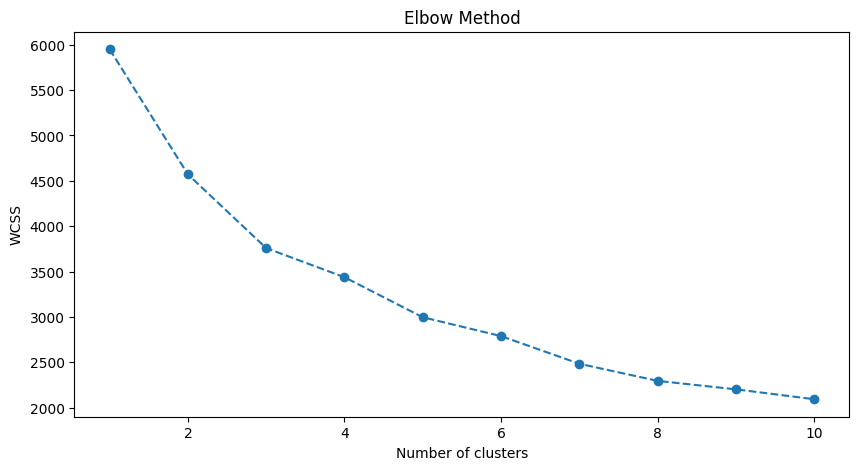

In [39]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Silhuette score for k= 2 to 11
 # +1: Indicates the data point is well within its cluster and far from neighboring clusters.
#0: Suggests the data point is close to a cluster boundary.
# -1: Implies the data point may be in the wrong cluster, as it's closer to a neighboring cluster.

In [48]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)
    print(f"For k={k}, Silhouette Score = {score:.4f}")


For k=2, Silhouette Score = 0.2798
For k=3, Silhouette Score = 0.2792
For k=4, Silhouette Score = 0.2601
For k=5, Silhouette Score = 0.2330
For k=6, Silhouette Score = 0.2065
For k=7, Silhouette Score = 0.2244
For k=8, Silhouette Score = 0.2204
For k=9, Silhouette Score = 0.2148
For k=10, Silhouette Score = 0.2044


# plot silhouette score

Text(0.5, 0, 'Number of clusters')

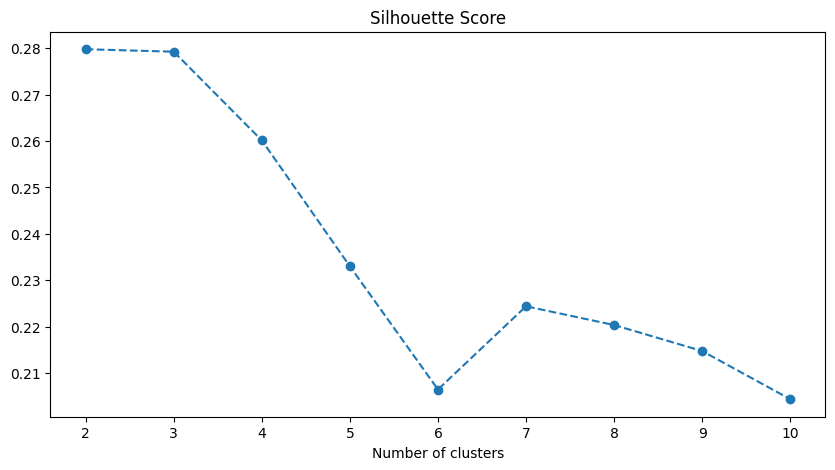

In [49]:
plt.figure(figsize=(10,5))
plt.plot(range(2,11),silhouette_scores,marker='o',linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')